In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

file_path = "concentration_field.txt"
output_data = np.loadtxt(file_path, skiprows=3)

columns = ['time']

# unifoprm spacing of 1001 nodes between 0 and 50

nodes = np.linspace(0, 50, 1001)
# round to 2 decimal places
nodes = np.round(nodes, 2)
# turning the nodes into strings
nodes = [str(node) for node in nodes]

columns.extend(nodes)

print(columns)

df = pd.DataFrame(output_data, columns=columns)

# We need to round the time column to closest integer on magnitude of 10
# for example if the time is 15.1 then it is rounded to 20
# if the time is 14.9 then it is rounded to 10

df['time'] = np.round(df['time'] / 10) * 10
# round to integer
df['time'] = df['time'].astype(int)
df = df.set_index('time')
df.to_csv("concentration_field.csv", index=True)


['time', '0.0', '0.05', '0.1', '0.15', '0.2', '0.25', '0.3', '0.35', '0.4', '0.45', '0.5', '0.55', '0.6', '0.65', '0.7', '0.75', '0.8', '0.85', '0.9', '0.95', '1.0', '1.05', '1.1', '1.15', '1.2', '1.25', '1.3', '1.35', '1.4', '1.45', '1.5', '1.55', '1.6', '1.65', '1.7', '1.75', '1.8', '1.85', '1.9', '1.95', '2.0', '2.05', '2.1', '2.15', '2.2', '2.25', '2.3', '2.35', '2.4', '2.45', '2.5', '2.55', '2.6', '2.65', '2.7', '2.75', '2.8', '2.85', '2.9', '2.95', '3.0', '3.05', '3.1', '3.15', '3.2', '3.25', '3.3', '3.35', '3.4', '3.45', '3.5', '3.55', '3.6', '3.65', '3.7', '3.75', '3.8', '3.85', '3.9', '3.95', '4.0', '4.05', '4.1', '4.15', '4.2', '4.25', '4.3', '4.35', '4.4', '4.45', '4.5', '4.55', '4.6', '4.65', '4.7', '4.75', '4.8', '4.85', '4.9', '4.95', '5.0', '5.05', '5.1', '5.15', '5.2', '5.25', '5.3', '5.35', '5.4', '5.45', '5.5', '5.55', '5.6', '5.65', '5.7', '5.75', '5.8', '5.85', '5.9', '5.95', '6.0', '6.05', '6.1', '6.15', '6.2', '6.25', '6.3', '6.35', '6.4', '6.45', '6.5', '6.55', '

### FEM simulation result

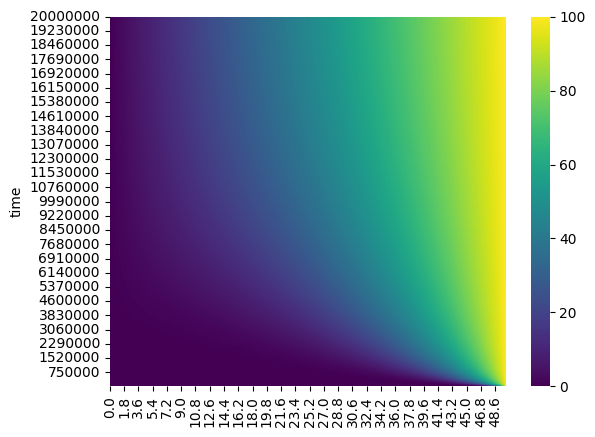

In [3]:
# Now we would love to plot a heatmap of the concentration field
# we would use the seaborn library for this

import seaborn as sns

# Y column is the time column
# X column is the nodes column

# We would love to plot y values with time = 0 at bottom to time = max time at the top
# we would also love to plot x values with x = 0 at left to x = max x at the right

# sort the df rows by time in descending order
df_sort = df.sort_index(ascending=False)
# we would use the seaborn library to plot the heatmap

# we would use another color theme than viridis
sns.heatmap(df_sort, cmap='viridis')
plt.show()